# EDA

In [1]:
import boto3
import io
import json
import pandas as pd
import numpy as np
from unidecode import unidecode

import matplotlib.pyplot as plt
import seaborn as sns; #sns.set(style="ticks", color_codes=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# AWS credentials to read files on S3 bucket
f = open('../credentials.json')
credentials = json.load(f)

s3_client = boto3.client(
    "s3",
    aws_access_key_id=credentials["Access key ID"],
    aws_secret_access_key=credentials["Secret access key"]
    )

s3_resource = boto3.resource(
    "s3",
    aws_access_key_id=credentials["Access key ID"],
    aws_secret_access_key=credentials["Secret access key"]
    )

In [3]:
# getting preprocessed data
df_full = []
prefix_objs = s3_resource.Bucket("cge").objects.filter(Prefix="processed")
keys = [obj.key for obj in prefix_objs]
for key in keys[1:]:
    obj = s3_client.get_object(Bucket="cge", Key=key)
    df = pd.read_csv(io.BytesIO(obj["Body"].read()))
    
    try:
        df_grouped = df[[
            "station_name",
            "precipitation_lag_1H",
            "temperature_lag_1H",
            "relative_humidity_lag_1H",
            "pressure_lag_1H",
            "wind_velocity_x_lag_1H",
            "wind_velocity_y_lag_1H",
            "wind_blow_x_lag_1H",
            "wind_blow_y_lag_1H"
        ]].groupby("station_name", as_index=False).mean()
    except:
        df_grouped = df[[
            "station_name",
            "precipitation_lag_1H",
            "temperature_lag_1H",
            "relative_humidity_lag_1H",
            "pressure_lag_1H"
        ]].groupby("station_name", as_index=False).mean()

    df_full.append(df_grouped)

In [4]:
df_grouped = pd.concat(df_full)
df_grouped

,station_name,precipitation_lag_1H,temperature_lag_1H,relative_humidity_lag_1H,pressure_lag_1H,wind_velocity_x_lag_1H,wind_velocity_y_lag_1H,wind_blow_x_lag_1H,wind_blow_y_lag_1H
0,Anhembi,1.949440,20.797645,75.457379,931.357506,-0.105968,0.425907,-0.383783,0.768364
0,Butantã,2.111367,20.472108,80.141187,933.056320,0.020492,0.003795,0.030196,0.037305
0,Campo Limpo,1.720926,20.828033,78.628181,931.790821,-0.232322,0.208733,-0.553067,0.600468
0,Capela do Socorro,1.852940,18.980764,89.168866,934.898782,NaN,NaN,NaN,NaN
0,Cidade Ademar,1.750235,20.697501,76.300718,930.913943,0.188826,-0.395791,0.395806,-0.725255
0,Freguesia do Ó,2.096589,20.664419,79.019213,927.133996,-0.205141,0.026434,-0.821665,0.060147
0,Ipiranga,1.863409,20.252540,80.739473,930.195112,NaN,NaN,NaN,NaN
0,Itaim Paulista,1.808878,20.345276,80.682610,935.080348,0.087375,0.042654,0.476692,0.258647
0,Itaquera,1.836740,20.008110,80.861833,933.177913,NaN,NaN,NaN,NaN
0,Jabaquara,2.051002,19.245555,73.049629,930.647960,NaN,NaN,NaN,NaN


In [5]:
df_grouped = df_grouped[df_grouped["station_name"].str.contains("Parelheiros") == False]
df_grouped = df_grouped.set_index("station_name")

In [6]:
df_grouped.columns = [i.split("_lag_1H")[0] for i in list(df_grouped.columns)]
df_grouped

,precipitation,temperature,relative_humidity,pressure,wind_velocity_x,wind_velocity_y,wind_blow_x,wind_blow_y
station_name,,,,,,,,
Anhembi,1.949440,20.797645,75.457379,931.357506,-0.105968,0.425907,-0.383783,0.768364
Butantã,2.111367,20.472108,80.141187,933.056320,0.020492,0.003795,0.030196,0.037305
Campo Limpo,1.720926,20.828033,78.628181,931.790821,-0.232322,0.208733,-0.553067,0.600468
Capela do Socorro,1.852940,18.980764,89.168866,934.898782,NaN,NaN,NaN,NaN
Cidade Ademar,1.750235,20.697501,76.300718,930.913943,0.188826,-0.395791,0.395806,-0.725255
Freguesia do Ó,2.096589,20.664419,79.019213,927.133996,-0.205141,0.026434,-0.821665,0.060147
Ipiranga,1.863409,20.252540,80.739473,930.195112,NaN,NaN,NaN,NaN
Itaim Paulista,1.808878,20.345276,80.682610,935.080348,0.087375,0.042654,0.476692,0.258647
Itaquera,1.836740,20.008110,80.861833,933.177913,NaN,NaN,NaN,NaN


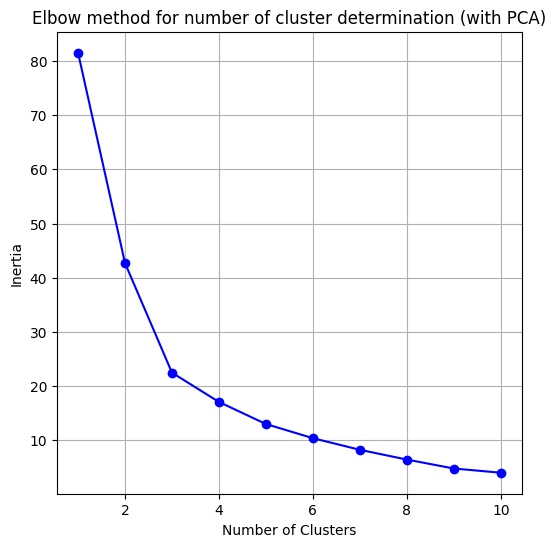

In [7]:
# Preparar os dados
X = df_grouped[["temperature", "relative_humidity", "precipitation"]].iloc[:, :].values  # Selecionar todas as colunas do conjunto de dados

# Normalizar os dados
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Aplicar PCA para redução de dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Encontrar o número ideal de clusters utilizando o método Elbow
n_clusters = range(1, 11)
inertias = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do método Elbow
plt.subplots(figsize=(6, 6))
plt.plot(n_clusters, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for number of cluster determination (with PCA)')
plt.grid()
plt.savefig(f'../figures/elbow_method.png', dpi=300, bbox_inches="tight")
plt.show()

[[ 2.27318771 -0.07921123]
 [-0.66146294 -0.68500795]
 [-0.41302024  1.1944874 ]]


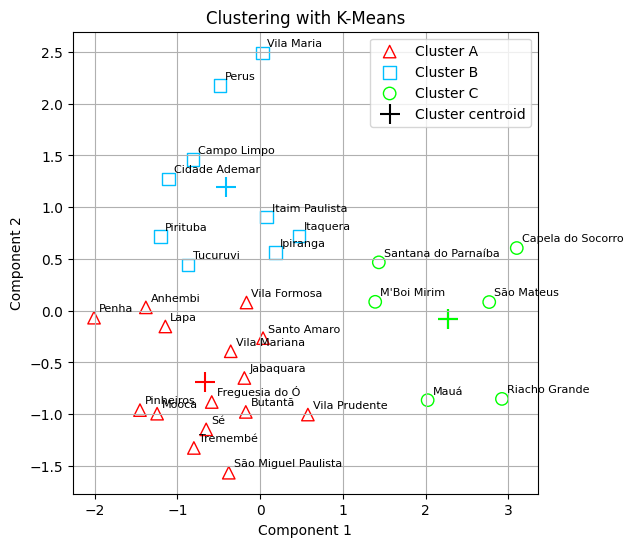

In [8]:
# Clusterizar os dados com o número de clusters escolhido
k = 3  # Número de clusters escolhido
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

centroids = kmeans.cluster_centers_
print(centroids)

kmeans_output = pd.DataFrame(
    data=X_pca,
    index=df_grouped.index
    )

kmeans_output["cluster"] = y_kmeans

# Plotar os clusters encontrados
plt.subplots(figsize=(6, 6))

plt.scatter(
    kmeans_output[kmeans_output.cluster == 1][0],
    kmeans_output[kmeans_output.cluster == 1][1],
    marker="^",
    s=80,
    label='Cluster A',
    facecolors='none',
    edgecolors='red'
)

plt.scatter(
    kmeans_output[kmeans_output.cluster == 2][0],
    kmeans_output[kmeans_output.cluster == 2][1],
    marker="s",
    s=80,
    label='Cluster B',
    facecolors='none',
    edgecolors='deepskyblue'
)

plt.scatter(
    kmeans_output[kmeans_output.cluster == 0][0], 
    kmeans_output[kmeans_output.cluster == 0][1], 
    marker="o", 
    s=80, 
    label='Cluster C',
    facecolors='none',
    edgecolors='lime'
)

for idx, row in kmeans_output.iterrows(): 
    plt.text(row[0]+.06, row[1]+.06, idx, size=8)

plt.scatter(centroids[0][0], centroids[0][1], marker="+", s=200, c='black', label='Cluster centroid')
plt.scatter(centroids[1][0], centroids[1][1], marker="+", s=200, c='red', label='_nolegend_')
plt.scatter(centroids[2][0], centroids[2][1], marker="+", s=200, c='deepskyblue', label='_nolegend_')
plt.scatter(centroids[0][0], centroids[0][1], marker="+", s=200, c='lime', label='_nolegend_')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering with K-Means')
plt.grid()
plt.legend(prop={'size': 10})
plt.savefig(f'../figures/clusters.png', dpi=300, bbox_inches="tight")
plt.show()

In [9]:
df_grouped = df_grouped.merge(kmeans_output, left_index=True, right_index=True)
df_grouped = df_grouped.drop([0, 1], axis=1)
df_grouped = df_grouped.sort_values("cluster")
df_grouped = df_grouped[["precipitation", "temperature", "relative_humidity", "cluster"]]
df_grouped['cluster'] = df_grouped['cluster'].map({0: "C", 1: "A", 2: "B"})
df_grouped_2 = df_grouped
df_grouped

,precipitation,temperature,relative_humidity,cluster
station_name,,,,
Capela do Socorro,1.852940,18.980764,89.168866,C
São Mateus,1.936568,19.041406,87.750561,C
Santana do Parnaíba,1.876959,19.681583,84.209751,C
Riacho Grande,2.084430,18.636648,86.317461,C
M'Boi Mirim,1.939557,19.910831,85.296972,C
Mauá,2.087845,19.087075,84.058023,C
Anhembi,1.949440,20.797645,75.457379,A
Vila Formosa,1.940529,20.281289,79.050065,A
Tremembé,2.170077,21.075564,80.221718,A


In [10]:
# getting preprocessed data
df_full_0 = []
df_full_1 = []
df_full_2 = []
prefix_objs = s3_resource.Bucket("cge").objects.filter(Prefix="processed")
keys = [obj.key for obj in prefix_objs]
for key in keys[1:]:
    obj = s3_client.get_object(Bucket="cge", Key=key)
    df = pd.read_csv(io.BytesIO(obj["Body"].read()))
    
    try:
        df_2 = df[[
            "timestamp",
            "station_name",
            "precipitation_lag_1H",
            "temperature_lag_1H",
            "relative_humidity_lag_1H",
            "pressure_lag_1H",
            "wind_velocity_x_lag_1H",
            "wind_velocity_y_lag_1H",
            "wind_blow_x_lag_1H",
            "wind_blow_y_lag_1H"
        ]]
    except:
        df_2 = df[[
            "timestamp",
            "station_name",
            "precipitation_lag_1H",
            "temperature_lag_1H",
            "relative_humidity_lag_1H",
            "pressure_lag_1H"
        ]]
    

    if df_2.station_name.unique()[0] in list(df_grouped[df_grouped.cluster == "A"].index): 
        df_full_0.append(df_2)
    if df_2.station_name.unique()[0] in list(df_grouped[df_grouped.cluster == "B"].index): 
        df_full_1.append(df_2)
    if df_2.station_name.unique()[0] in list(df_grouped[df_grouped.cluster == "C"].index): 
        df_full_2.append(df_2)

In [11]:
df_cluster_A = pd.concat(df_full_0)
df_cluster_B = pd.concat(df_full_1)
df_cluster_C = pd.concat(df_full_2)

In [12]:
df_cluster_A

,timestamp,station_name,precipitation_lag_1H,temperature_lag_1H,relative_humidity_lag_1H,pressure_lag_1H,wind_velocity_x_lag_1H,wind_velocity_y_lag_1H,wind_blow_x_lag_1H,wind_blow_y_lag_1H
0,2009-01-01 00:00:00,Anhembi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01 01:00:00,Anhembi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01 02:00:00,Anhembi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01 03:00:00,Anhembi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01 04:00:00,Anhembi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
51146,2019-02-18 18:00:00,Vila Prudente,0.0,29.017167,50.332167,925.251667,-0.616198,1.046655,-2.420626,3.673854
51147,2019-02-18 19:00:00,Vila Prudente,0.0,29.188333,48.691000,924.441667,-0.521406,0.994452,-1.369248,3.226073
51148,2019-02-18 20:00:00,Vila Prudente,0.0,27.572167,59.739167,924.261667,-0.285948,-0.439788,0.220984,-0.706963
51149,2019-02-18 21:00:00,Vila Prudente,0.0,24.831000,76.691833,923.675000,0.159642,-0.775077,0.333347,-2.687414


In [13]:
obj = s3_client.get_object(Bucket="cge", Key='processed/parelheiros.csv')
df_parelheiros = pd.read_csv(io.BytesIO(obj["Body"].read()))
df_parelheiros = df_parelheiros[["timestamp", "temperature"]].rename(columns={"temperature": "temperature_rural"}).dropna()
df_parelheiros 

,timestamp,temperature_rural
21,2012-08-14 15:00:00,18.578000
22,2012-08-14 16:00:00,19.113833
23,2012-08-14 17:00:00,18.368333
24,2012-08-14 18:00:00,15.808667
25,2012-08-14 19:00:00,14.875333
...,...,...
57120,2019-02-18 18:00:00,24.683000
57121,2019-02-18 19:00:00,23.723167
57122,2019-02-18 20:00:00,22.447333
57123,2019-02-18 21:00:00,21.134667


In [14]:
df_cluster_A = df_cluster_A.merge(df_parelheiros, on="timestamp")
df_cluster_B = df_cluster_B.merge(df_parelheiros, on="timestamp")
df_cluster_C = df_cluster_C.merge(df_parelheiros, on="timestamp")

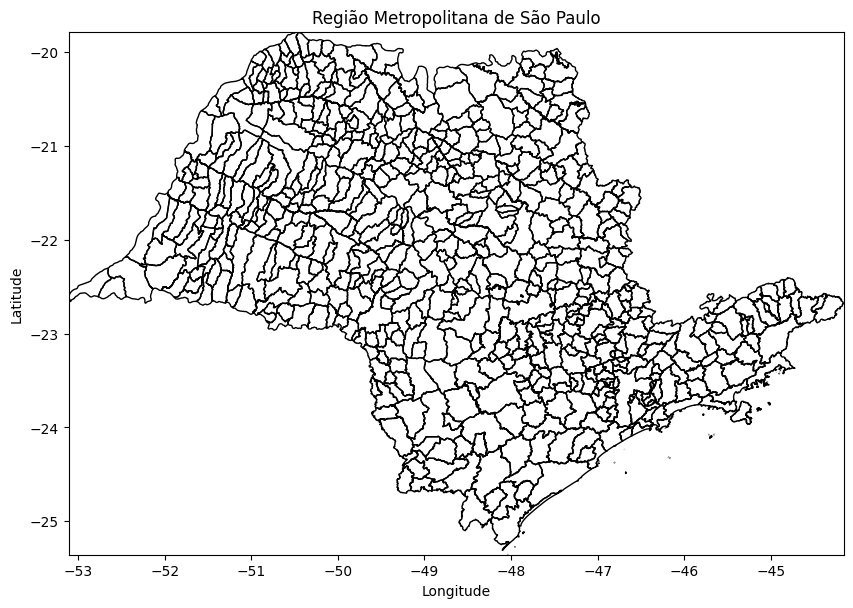

In [15]:
# ref: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=downloads

import geopandas as gpd
import matplotlib.pyplot as plt

epsg = 4326

# Carregue o arquivo shapefile
sp = gpd.read_file('SP_Municipios_2022')
sp = sp.to_crs(f'EPSG:{epsg}')

# Plote o mapa da RMSP
fig, ax = plt.subplots(figsize=(10, 10))
sp.plot(ax=ax, edgecolor='black', facecolor='none')

# Ajuste os limites do gráfico para mostrar apenas a RMSP
ax.set_xlim(sp.bounds.minx.min(), sp.bounds.maxx.max())
ax.set_ylim(sp.bounds.miny.min(), sp.bounds.maxy.max())

# Adicione títulos e rótulos
ax.set_title('Região Metropolitana de São Paulo')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Exiba o gráfico
plt.show()


In [16]:
df_grouped = df_grouped.reset_index()[["station_name", "cluster"]]
df_grouped["color"] = df_grouped.cluster.map({"A": "green", "B": "red", "C": "blue"})
df_grouped

,station_name,cluster,color
0,Capela do Socorro,C,blue
1,São Mateus,C,blue
2,Santana do Parnaíba,C,blue
3,Riacho Grande,C,blue
4,M'Boi Mirim,C,blue
5,Mauá,C,blue
6,Anhembi,A,green
7,Vila Formosa,A,green
8,Tremembé,A,green
9,Sé,A,green


In [17]:
localization_stations = pd.read_csv("estacoes_meteorologicas_cge.csv")
localization_stations

,station,lat,lon
0,Sé,-23.552718,-46.656168
1,Anhembi,-23.518626,-46.643757
2,Vila Mariana,-23.584720,-46.635560
3,Ipiranga,-23.632978,-46.583518
4,Campo Limpo,-23.658180,-46.767490
5,M'Boi Mirim,-23.671266,-46.727361
6,Santo Amaro,-23.634789,-46.667657
7,Jabaquara,-23.650814,-46.646581
8,Cidade Ademar,-23.667670,-46.674160
9,Capela do Socorro,-23.781133,-46.725217


In [18]:
localization_stations = localization_stations.merge(
    df_grouped,
    left_on="station",
    right_on="station_name"
    )

localization_stations

,station,lat,lon,station_name,cluster,color
0,Sé,-23.552718,-46.656168,Sé,A,green
1,Anhembi,-23.518626,-46.643757,Anhembi,A,green
2,Vila Mariana,-23.584720,-46.635560,Vila Mariana,A,green
3,Ipiranga,-23.632978,-46.583518,Ipiranga,B,red
4,Campo Limpo,-23.658180,-46.767490,Campo Limpo,B,red
5,M'Boi Mirim,-23.671266,-46.727361,M'Boi Mirim,C,blue
6,Santo Amaro,-23.634789,-46.667657,Santo Amaro,A,green
7,Jabaquara,-23.650814,-46.646581,Jabaquara,A,green
8,Cidade Ademar,-23.667670,-46.674160,Cidade Ademar,B,red
9,Capela do Socorro,-23.781133,-46.725217,Capela do Socorro,C,blue


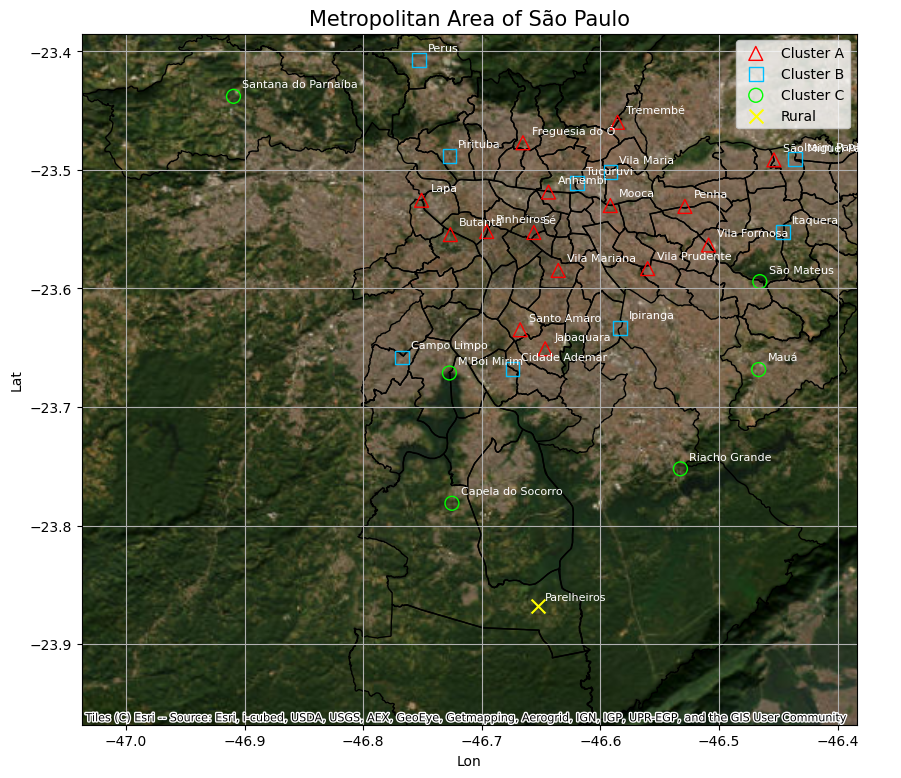

In [19]:
import contextily as ctx

masp_cities = [
    "Mauá",  
    "São Bernardo do Campo",  
    "Santana de Parnaíba", 
]

sp_masp_cities = sp[sp.NM_MUN.isin(masp_cities)]

sp_cidade = gpd.read_file('LAYER_DISTRITO')
sp_cidade = sp_cidade.to_crs(f'EPSG:{epsg}')

weather_stations_cluster_A = list(localization_stations[localization_stations.cluster == "A"][["lat", "lon"]].itertuples(index=False, name=None))
weather_stations_cluster_B = list(localization_stations[localization_stations.cluster == "B"][["lat", "lon"]].itertuples(index=False, name=None))
weather_stations_cluster_C = list(localization_stations[localization_stations.cluster == "C"][["lat", "lon"]].itertuples(index=False, name=None))

# Crie um GeoDataFrame com as coordenadas das estações meteorológicas e atribua o CRS (EPSG: 4326)
weather_stations_gdf_cluster_A = gpd.GeoDataFrame(geometry=gpd.points_from_xy([x[1] for x in weather_stations_cluster_A], [x[0] for x in weather_stations_cluster_A]), crs=f"EPSG:{epsg}")
weather_stations_gdf_cluster_B = gpd.GeoDataFrame(geometry=gpd.points_from_xy([x[1] for x in weather_stations_cluster_B], [x[0] for x in weather_stations_cluster_B]), crs=f"EPSG:{epsg}")
weather_stations_gdf_cluster_C = gpd.GeoDataFrame(geometry=gpd.points_from_xy([x[1] for x in weather_stations_cluster_C], [x[0] for x in weather_stations_cluster_C]), crs=f"EPSG:{epsg}")

# Converta as coordenadas das estações meteorológicas para o sistema de coordenadas Web Mercator (EPSG: 3857)
weather_stations_gdf_cluster_A_projected = weather_stations_gdf_cluster_A.to_crs(epsg=epsg)
weather_stations_gdf_cluster_B_projected = weather_stations_gdf_cluster_B.to_crs(epsg=epsg)
weather_stations_gdf_cluster_C_projected = weather_stations_gdf_cluster_C.to_crs(epsg=epsg)

# Plote o mapa da RMSP
fig, ax = plt.subplots(figsize=(10, 10))
sp_masp_cities.plot(ax=ax, edgecolor='black', facecolor='none')
sp_cidade.plot(ax=ax, edgecolor='black', facecolor='none')

# Adicione a imagem de satélite usando o Contextily
ctx.add_basemap(
    ax, 
    source=ctx.providers.Esri.WorldImagery, 
    # zoom="auto", 
    crs=f"EPSG:{epsg}"
)

# Plote os pontos das estações meteorológicas
ax.scatter(
    weather_stations_gdf_cluster_A_projected.geometry.x, 
    weather_stations_gdf_cluster_A_projected.geometry.y,
    marker="^",
    s=100,
    label='Cluster A',
    facecolors='none',
    edgecolors='red'
)

ax.scatter(
    weather_stations_gdf_cluster_B_projected.geometry.x, 
    weather_stations_gdf_cluster_B_projected.geometry.y, 
    marker="s",
    s=100,
    label='Cluster B',
    facecolors='none',
    edgecolors='deepskyblue'
)

ax.scatter(
    weather_stations_gdf_cluster_C_projected.geometry.x, 
    weather_stations_gdf_cluster_C_projected.geometry.y,
    marker="o",
    s=100,
    label='Cluster C',
    facecolors='none',
    edgecolors='lime'
)

# Plote da estação de referência rural
ax.scatter(
    -46.652222, 
    -23.867778, 
    marker="x",
    s=100,
    label='Rural',
    color='yellow'
)

# Ajuste os limites do gráfico para mostrar apenas a RMSP
ax.set_xlim(sp_masp_cities.bounds.minx.min(), sp_masp_cities.bounds.maxx.max())
ax.set_ylim(sp_masp_cities.bounds.miny.min(), sp_masp_cities.bounds.maxy.max())

# Adicione títulos e rótulos
ax.set_title('Metropolitan Area of São Paulo', fontdict={'fontsize': 15})
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# Adicione a legenda
ax.legend()
ax.grid()

for idx, row in localization_stations.set_index('station').iterrows(): 
    plt.text(
        row['lon']+0.0075, 
        row['lat']+0.0075, 
        idx, 
        size=8, 
        color='white'
    )

plt.text(
    -46.652222+0.005, 
    -23.867778+0.005, 
    'Parelheiros', 
    size=8, 
    color='white'
)

# Exiba o gráfico
plt.savefig(f'../figures/masp_clusters.png', dpi=300, bbox_inches="tight")
plt.show()

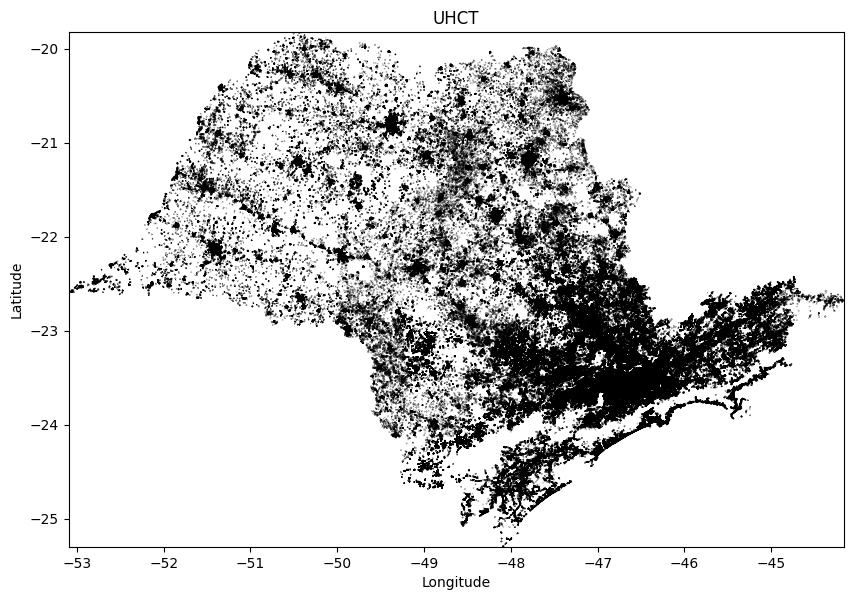

In [20]:
# Carregue o arquivo shapefile
uhct = gpd.read_file('UHCT_112015_v2')
new_crs = 'EPSG:4326'
uhct = uhct.to_crs(new_crs)

# Plote o mapa da RMSP
fig, ax = plt.subplots(figsize=(10, 10))
uhct.plot(ax=ax, edgecolor='black', facecolor='none')

# Ajuste os limites do gráfico para mostrar apenas a RMSP
ax.set_xlim(uhct.bounds.minx.min(), uhct.bounds.maxx.max())
ax.set_ylim(uhct.bounds.miny.min(), uhct.bounds.maxy.max())

# Adicione títulos e rótulos
ax.set_title('UHCT')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Exiba o gráfico
plt.show()


In [21]:
list(uhct.Uso_ocup.unique())

['agua',
 'mata',
 'area desocupada',
 'espaco verde urbano',
 'grandes equipamentos',
 'loteamento',
 'residencial comercial servicos',
 'comercial servicos praia']

In [22]:
# uhct_agua = uhct[uhct.Uso_ocup == 'agua']
# uhct_mata = uhct[uhct.Uso_ocup == 'mata']
# uhct_area_desocupada = uhct[uhct.Uso_ocup == 'area desocupada']
# uhct_espaco_verde_urbano = uhct[uhct.Uso_ocup == 'espaco verde urbano']
# uhct_grandes_equipamentos = uhct[uhct.Uso_ocup == 'grandes equipamentos']
# uhct_residencial_comercial_servicos = uhct[uhct.Uso_ocup == 'residencial comercial servicos']
# uhct_comercial_servicos_praia = uhct[uhct.Uso_ocup == 'comercial servicos praia']

In [23]:
# # Converta o shapefile para GeoJSON
# sp_geojson = sp.to_json()
# sp_cidade_geojson = sp_cidade.to_json()
# uhct_geojson = uhct.to_json()

In [24]:
# import folium

# # Defina as coordenadas iniciais do mapa (latitude e longitude do centro da RMSP)
# initial_coordinates = (-23.5489, -46.6388)

# # Crie o mapa com o zoom inicial
# m = folium.Map(
#     location=initial_coordinates, 
#     zoom_start=11,
#     tiles="Cartodb Positron",
#     zoom_control=False,
#     scrollWheelZoom=False,
#     dragging=False
# )

# # Adicione a camada GeoJSON ao mapa
# folium.GeoJson(
#     sp_geojson,
#     name="Cidades do estado de São Paulo",
#     style_function=lambda feature: {
#         'fillColor': 'none',
#         'color': 'black',
#         'weight': 0.5,
#     }
# ).add_to(m)

# folium.GeoJson(
#     sp_cidade_geojson,
#     name="Bairros da cidade de São Paulo",
#     style_function=lambda feature: {
#         'fillColor': 'none',
#         'color': 'black',
#         'weight': 0.5,
#     }
# ).add_to(m)

# for i in range(0, len(localization_stations)):
#     folium.CircleMarker(
#         location=[localization_stations['lat'][i], localization_stations['lon'][i]],
#         popup=localization_stations["station"][i],
#         # icon=folium.Icon(color=localization_stations["color"][i])
#         color=localization_stations["color"][i],
#         radius=10,
#         fill=True,
#         fill_color=localization_stations["color"][i]
#         ).add_to(m)

# # exibir mapa
# m


In [25]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

df_uhct = []
for i in range(0, len(localization_stations)):
    # Carregar o shapefile
    shapefile_path = "UHCT_112015_v2"
    gdf = gpd.read_file(shapefile_path)

    # Coordenadas da estação meteorológica
    latitude = localization_stations['lat'][i]
    longitude = localization_stations['lon'][i]
    station_point = Point(longitude, latitude)

    # Criar um buffer de 500 metros ao redor da estação meteorológica
    buffer_radius = 500  # metros
    buffer = station_point.buffer(buffer_radius / 111320)  # aproximadamente 1 grau = 111.32km

    # Selecionar polígonos que interseccionam com o buffer
    buffer_gdf = gpd.GeoDataFrame(geometry=[buffer], crs=gdf.crs)
    intersected_polygons = gpd.overlay(gdf, buffer_gdf, how="intersection")

    # Calcular a área de cada polígono e a área total no buffer
    intersected_polygons["area"] = intersected_polygons.geometry.area * 111320**2
    total_area = intersected_polygons["area"].sum()

    # Calcular a porcentagem de uso e ocupação do solo
    percentages = (intersected_polygons.groupby("Uso_ocup")["area"].sum() / total_area) * 100

    df = pd.DataFrame(percentages).reset_index()

    df_pivot = pd.pivot_table(
        df, 
        values='area',
        columns=['Uso_ocup']
    ).reset_index()

    df_pivot['station'] = localization_stations['station'][i]
    df_uhct.append(df_pivot)

uhct_perc = pd.concat(df_uhct)
uhct_perc

/tmp/ipykernel_14659/1662697658.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersected_polygons["area"] = intersected_polygons.geometry.area * 111320**2
/tmp/ipykernel_14659/1662697658.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersected_polygons["area"] = intersected_polygons.geometry.area * 111320**2
/tmp/ipykernel_14659/1662697658.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersected_polygons["area"] = intersected_polygons.geometry.area * 111320**2
/tmp/ipykernel_14659/1662697658.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'a

Uso_ocup,index,grandes equipamentos,residencial comercial servicos,station,agua,espaco verde urbano,loteamento,mata,area desocupada
0,area,15.701369,84.298631,Sé,NaN,NaN,NaN,NaN,NaN
0,area,76.740570,10.117707,Anhembi,10.654633,2.487090,NaN,NaN,NaN
0,area,21.383760,78.616240,Vila Mariana,NaN,NaN,NaN,NaN,NaN
0,area,24.414955,68.747963,Ipiranga,6.443829,0.393253,NaN,NaN,NaN
0,area,34.903320,58.311786,Campo Limpo,NaN,NaN,6.721434,0.06346,NaN
0,area,70.911764,23.144509,M'Boi Mirim,4.950781,0.992946,NaN,NaN,NaN
0,area,20.920701,70.229395,Santo Amaro,NaN,8.849904,NaN,NaN,NaN
0,area,34.699209,65.300791,Jabaquara,NaN,NaN,NaN,NaN,NaN
0,area,12.826824,87.173176,Cidade Ademar,NaN,NaN,NaN,NaN,NaN
0,area,9.025229,90.974771,Capela do Socorro,NaN,NaN,NaN,NaN,NaN


In [26]:
len(uhct_perc)

30

In [27]:
list(uhct_perc.columns)

['index',
 'grandes equipamentos',
 'residencial comercial servicos',
 'station',
 'agua',
 'espaco verde urbano',
 'loteamento',
 'mata',
 'area desocupada']

In [28]:
df_grouped_2

,precipitation,temperature,relative_humidity,cluster
station_name,,,,
Capela do Socorro,1.852940,18.980764,89.168866,C
São Mateus,1.936568,19.041406,87.750561,C
Santana do Parnaíba,1.876959,19.681583,84.209751,C
Riacho Grande,2.084430,18.636648,86.317461,C
M'Boi Mirim,1.939557,19.910831,85.296972,C
Mauá,2.087845,19.087075,84.058023,C
Anhembi,1.949440,20.797645,75.457379,A
Vila Formosa,1.940529,20.281289,79.050065,A
Tremembé,2.170077,21.075564,80.221718,A


In [29]:
# df_grouped_2 = df_grouped_2.reset_index().merge(uhct_perc, left_on='station_name', right_on='station').fillna(0).drop('index', axis=1).reset_index(drop=True)
df_grouped_2 = df_grouped_2.merge(uhct_perc, left_on='station_name', right_on='station').fillna(0).drop('index', axis=1).reset_index(drop=True)
df_grouped_2

,precipitation,temperature,relative_humidity,cluster,grandes equipamentos,residencial comercial servicos,station,agua,espaco verde urbano,loteamento,mata,area desocupada
0,1.852940,18.980764,89.168866,C,9.025229,90.974771,Capela do Socorro,0.000000,0.000000,0.000000,0.00000,0.000000
1,1.936568,19.041406,87.750561,C,45.003795,4.544428,São Mateus,0.000000,4.319017,0.000000,46.13276,0.000000
2,1.876959,19.681583,84.209751,C,1.821456,98.178544,Santana do Parnaíba,0.000000,0.000000,0.000000,0.00000,0.000000
3,2.084430,18.636648,86.317461,C,27.581394,72.418606,Riacho Grande,0.000000,0.000000,0.000000,0.00000,0.000000
4,1.939557,19.910831,85.296972,C,70.911764,23.144509,M'Boi Mirim,4.950781,0.992946,0.000000,0.00000,0.000000
5,2.087845,19.087075,84.058023,C,74.298890,17.397593,Mauá,0.000000,8.303517,0.000000,0.00000,0.000000
6,1.949440,20.797645,75.457379,A,76.740570,10.117707,Anhembi,10.654633,2.487090,0.000000,0.00000,0.000000
7,1.940529,20.281289,79.050065,A,46.860946,49.479180,Vila Formosa,1.977835,1.682040,0.000000,0.00000,0.000000
8,2.170077,21.075564,80.221718,A,36.487432,62.103747,Tremembé,0.000000,1.408821,0.000000,0.00000,0.000000
9,2.138073,20.535455,77.936695,A,15.701369,84.298631,Sé,0.000000,0.000000,0.000000,0.00000,0.000000


In [30]:
list(df_grouped_2.columns)

['precipitation',
 'temperature',
 'relative_humidity',
 'cluster',
 'grandes equipamentos',
 'residencial comercial servicos',
 'station',
 'agua',
 'espaco verde urbano',
 'loteamento',
 'mata',
 'area desocupada']

In [31]:
df_grouped_boxplot = df_grouped_2[[
    'precipitation',
    'temperature',
    'relative_humidity',
    'grandes equipamentos',
    'residencial comercial servicos',
    'agua',
    'espaco verde urbano',
    'mata',
    'area desocupada',
    'cluster'
    ]]

df_grouped_boxplot.columns = [
    "Precipitation", 
    "Temperature", 
    "Relative Humidity",
    'Large Equipament',
    'Residential/Commercial/Services',
    'Water',
    'Urban Green Areas',
    'Forest',
    'Unoccupied Land',
    "cluster"
]

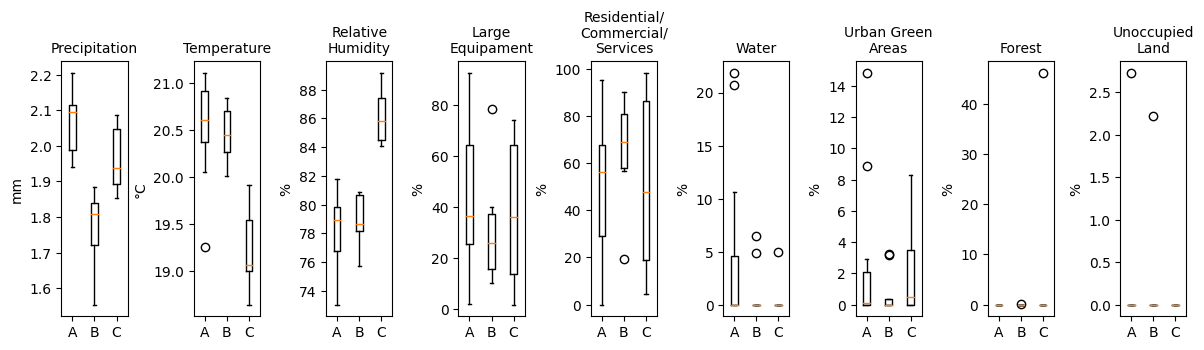

In [32]:
vars = list(df_grouped_boxplot.drop("cluster", axis=1).columns)

fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(12.5, 3))
p = 0

for i in vars:
    # Lista com os grupos de dados
    
    dados = [
        df_grouped_boxplot[df_grouped_boxplot.cluster == "A"][i], 
        df_grouped_boxplot[df_grouped_boxplot.cluster == "B"][i], 
        df_grouped_boxplot[df_grouped_boxplot.cluster == "C"][i]
        ]

    # Nomes dos grupos
    nomes_grupos = ['A', 'B', 'C']

    # Criar o boxplot
    axs[p].boxplot(dados, labels=nomes_grupos)

    # Adicionar título e rótulos dos eixos
    parameter = i

    if parameter == "Relative Humidity":
        parameter = "Relative\nHumidity"
    elif parameter == "Large Equipament":
        parameter = "Large\nEquipament"
    elif parameter == "Residential/Commercial/Services":
        parameter = "Residential/\nCommercial/\nServices"
    elif parameter == "Urban Green Areas":
        parameter = "Urban Green\nAreas"
    elif parameter == "Unoccupied Land":
        parameter = "Unoccupied\nLand"

    axs[p].set_title(f'{parameter}', fontdict={'fontsize': 10})
    axs[p].set_xlabel('')
    
    if parameter == "Precipitation":
        ylabel = "mm"
    elif parameter == "Temperature":
        ylabel = "°C"
    else:
        ylabel = "%"
    
    axs[p].set_ylabel(ylabel)

    p += 1

fig.subplots_adjust(
    left=0.08, 
    right=0.98, 
    bottom=0.05, 
    top=0.9,
    wspace=1
)

plt.savefig(f'../figures/boxplot_clusters_parameters.png', dpi=300, bbox_inches="tight")
plt.show()

In [33]:
df_cluster_A

,timestamp,station_name,precipitation_lag_1H,temperature_lag_1H,relative_humidity_lag_1H,pressure_lag_1H,wind_velocity_x_lag_1H,wind_velocity_y_lag_1H,wind_blow_x_lag_1H,wind_blow_y_lag_1H,temperature_rural
0,2012-08-14 15:00:00,Anhembi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.5780
1,2012-08-14 15:00:00,Butantã,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.5780
2,2012-08-14 15:00:00,Lapa,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.5780
3,2012-08-14 15:00:00,Mooca,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.5780
4,2012-08-14 15:00:00,Santo Amaro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.5780
...,...,...,...,...,...,...,...,...,...,...,...
757023,2019-02-18 22:00:00,São Miguel Paulista,0.0,24.057167,81.191667,928.175000,NaN,NaN,NaN,NaN,20.7402
757024,2019-02-18 22:00:00,Sé,0.0,24.953500,82.466000,916.911667,-1.993963,1.470847,-3.058473,2.339249,20.7402
757025,2019-02-18 22:00:00,Vila Formosa,0.0,23.179000,98.840833,926.375000,NaN,NaN,NaN,NaN,20.7402
757026,2019-02-18 22:00:00,Vila Mariana,0.0,23.958000,80.763000,918.461667,-0.112860,-0.487360,-1.426960,-0.663201,20.7402


In [34]:
def revert_lag(df, cols):
    df[cols] = df[cols].shift(-1)
    return df

In [35]:
def apply_revert_lags(df, cols):
    dfs = []
    for i in df.station_name.unique():
        dfi = df[df.station_name == i]
        dfi = revert_lag(dfi, cols)
        dfs.append(dfi)
    return pd.concat(dfs)

In [36]:
cols = [
    "precipitation_lag_1H",
    "temperature_lag_1H",
    "relative_humidity_lag_1H",
    "pressure_lag_1H",
    "wind_velocity_x_lag_1H",
    "wind_velocity_y_lag_1H",
    "wind_blow_x_lag_1H",
    "wind_blow_y_lag_1H"
    ]


df_cluster_A = apply_revert_lags(df=df_cluster_A, cols=cols)
df_cluster_B = apply_revert_lags(df=df_cluster_B, cols=cols)
df_cluster_C = apply_revert_lags(df=df_cluster_C, cols=cols)

/tmp/ipykernel_14659/1133768500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].shift(-1)
/tmp/ipykernel_14659/1133768500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].shift(-1)
/tmp/ipykernel_14659/1133768500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [37]:
def calculate_uhii(df):
    df['uhii'] = df.temperature_lag_1H - df.temperature_rural
    return df

In [38]:
df_cluster_A = calculate_uhii(df=df_cluster_A)
df_cluster_B = calculate_uhii(df=df_cluster_B)
df_cluster_C = calculate_uhii(df=df_cluster_C)

In [39]:
df_cluster_A

,timestamp,station_name,precipitation_lag_1H,temperature_lag_1H,relative_humidity_lag_1H,pressure_lag_1H,wind_velocity_x_lag_1H,wind_velocity_y_lag_1H,wind_blow_x_lag_1H,wind_blow_y_lag_1H,temperature_rural,uhii
0,2012-08-14 15:00:00,Anhembi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.578000,NaN
9,2012-08-14 16:00:00,Anhembi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.113833,NaN
18,2012-08-14 17:00:00,Anhembi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.368333,NaN
27,2012-08-14 18:00:00,Anhembi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.808667,NaN
36,2012-08-14 19:00:00,Anhembi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.875333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
756961,2019-02-18 18:00:00,Pinheiros,0.0,29.247167,56.840833,925.920000,NaN,NaN,NaN,NaN,24.683000,4.564167
756976,2019-02-18 19:00:00,Pinheiros,0.0,29.431667,58.752500,925.808333,NaN,NaN,NaN,NaN,23.723167,5.708500
756991,2019-02-18 20:00:00,Pinheiros,0.0,27.065000,64.118833,925.980000,NaN,NaN,NaN,NaN,22.447333,4.617667
757006,2019-02-18 21:00:00,Pinheiros,0.0,25.574500,75.927833,926.808333,NaN,NaN,NaN,NaN,21.134667,4.439833


In [40]:
def plots_quant(df, cluster_name):
    df['quantile'] = pd.qcut(df['uhii'], q=4, labels=['1st', '2nd', '3rd', '4th'])
    for i in list(df.drop(["timestamp", "station_name", 'quantile'], axis=1).columns):
        sns.kdeplot(data=df, x=i, bw_method='scott', kernel='gau', shade=True, hue="quantile")
        plt.grid()
        # plt.savefig(f'../figures/kde_{cluster_name}_{i}.png', dpi=300, bbox_inches="tight")
        plt.show()

In [41]:
# plots_quant(df_cluster_A, "Cluster A")

In [42]:

# plots_quant(df_cluster_B, "Cluster B")

In [43]:
# plots_quant(df_cluster_C, "Cluster C")

In [44]:
# df_cluster_A['timestamp'] = pd.to_datetime(df_cluster_A['timestamp'])
# df_cluster_A_grouped = df_cluster_A[["timestamp", "uhii"]].groupby("timestamp").mean()
# df_cluster_A_grouped = df_cluster_A_grouped.reset_index()
# df_cluster_A_grouped = df_cluster_A_grouped.dropna()
# df_cluster_A_grouped

In [45]:
def uhii_cumsum(df, feature_name):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df_grouped = df[["timestamp", "uhii"]].groupby("timestamp").mean()
    df_grouped['uhii_5'] = df_grouped["uhii"] >= 5
    df_grouped['uhii_5'] = df_grouped['uhii_5'].map({False: 0, True:1})
    annual_cumulative_sum = df_grouped[['uhii_5']].resample('Y').sum()
    annual_cumulative_sum.columns = [feature_name]
    return annual_cumulative_sum

In [46]:
cluster_A_cumsum = uhii_cumsum(df=df_cluster_A, feature_name='Cluster A')
cluster_B_cumsum = uhii_cumsum(df=df_cluster_B, feature_name='Cluster B')
cluster_C_cumsum = uhii_cumsum(df=df_cluster_C, feature_name='Cluster C')


In [47]:
clusters_cumsum = cluster_A_cumsum.merge(
    cluster_B_cumsum, left_index=True, right_index=True
    ).merge(cluster_C_cumsum, left_index=True, right_index=True)

clusters_cumsum.index = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [48]:
clusters_cumsum = clusters_cumsum.loc[2013:2018]
clusters_cumsum

,Cluster A,Cluster B,Cluster C
2013,344,362,46
2014,435,400,65
2015,325,317,33
2016,375,357,75
2017,362,312,23
2018,336,377,46


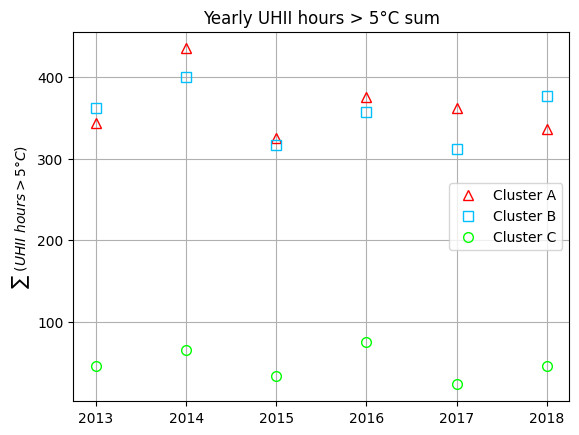

In [49]:
plt.plot(
    clusters_cumsum.index, clusters_cumsum[['Cluster A']],  
    marker="^", 
    ms=7, 
    label='Cluster A',
    mfc='none',
    mec='red',
    c='green',
    ls=''
)

plt.plot(
    clusters_cumsum.index, clusters_cumsum[['Cluster B']],
    marker="s",
    ms=7,
    label='Cluster B',
    mfc='none',
    mec='deepskyblue',
    c='red',
    ls=''
)

plt.plot(
    clusters_cumsum.index, clusters_cumsum[['Cluster C']],
    marker="o",
    ms=7,
    label='Cluster C',
    mfc='none',
    mec='lime',
    c='blue',
    ls=''
)

plt.xlabel('')
plt.ylabel('$\sum\ (UHII\ hours > 5°C)$')
plt.title('Yearly UHII hours > 5°C sum')
plt.grid()
plt.legend(prop={'size': 10})
plt.savefig(f'../figures/uhii_hours_sum.png', dpi=300, bbox_inches="tight")
plt.show()

In [50]:
def negative_island_hours_sum(df, feature_name):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df_grouped = df[["timestamp", "uhii"]].groupby("timestamp").mean()
    df_grouped['uhii_under5'] = df_grouped["uhii"] <= -5
    df_grouped['uhii_under5'] = df_grouped['uhii_under5'].map({False: 0, True:1})
    annual_sum = df_grouped[['uhii_under5']].resample('Y').sum()
    annual_sum.columns = [feature_name]
    return annual_sum

In [51]:
cluster_A_neg_sum = negative_island_hours_sum(df=df_cluster_A, feature_name='Cluster A')
cluster_B_neg_sum = negative_island_hours_sum(df=df_cluster_B, feature_name='Cluster B')
cluster_C_neg_sum = negative_island_hours_sum(df=df_cluster_C, feature_name='Cluster C')


In [52]:
clusters_neg_sum = cluster_A_neg_sum.merge(
    cluster_B_neg_sum, left_index=True, right_index=True
    ).merge(cluster_C_neg_sum, left_index=True, right_index=True)

clusters_neg_sum.index = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [53]:
clusters_neg_sum = clusters_neg_sum.loc[2013:2018]
clusters_neg_sum

,Cluster A,Cluster B,Cluster C
2013,0,0,0
2014,1,1,3
2015,2,0,0
2016,0,0,0
2017,0,0,0
2018,21,20,31


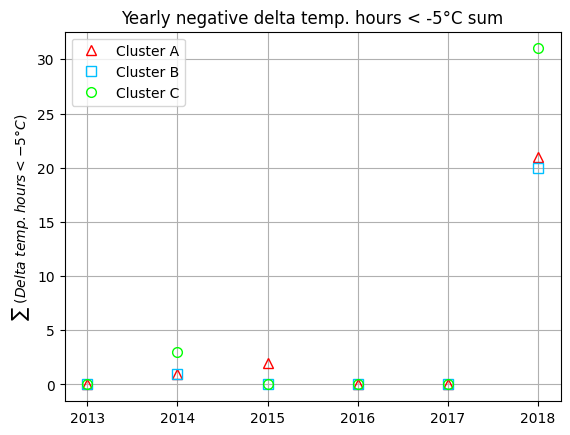

In [54]:
plt.plot(
    clusters_neg_sum.index, clusters_neg_sum[['Cluster A']],  
    marker="^", 
    ms=7, 
    label='Cluster A',
    mfc='none',
    mec='red',
    c='green',
    ls=''
)

plt.plot(
    clusters_neg_sum.index, clusters_neg_sum[['Cluster B']],
    marker="s",
    ms=7,
    label='Cluster B',
    mfc='none',
    mec='deepskyblue',
    c='red',
    ls=''
)

plt.plot(
    clusters_neg_sum.index, clusters_neg_sum[['Cluster C']],
    marker="o",
    ms=7,
    label='Cluster C',
    mfc='none',
    mec='lime',
    c='blue',
    ls=''
)

plt.xlabel('')
plt.ylabel('$\sum\ (Delta \ temp. hours < -5°C)$')
plt.title('Yearly negative delta temp. hours < -5°C sum')
plt.grid()
plt.legend(prop={'size': 10})
plt.savefig(f'../figures/negative_temperature_hours_sum.png', dpi=300, bbox_inches="tight")
plt.show()